In [1]:
import gensim 
from gensim.models import Word2Vec
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag.stanford import StanfordPOSTagger
import pandas as pd
import numpy as np
import collections
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
import nltk.collocations
import nltk.corpus
import collections
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from nltk import ne_chunk, pos_tag
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tree import Tree
from sklearn.cluster import KMeans

D:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\ACASA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\ACASA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# Am intelnit problema aceasta: https://stackoverflow.com/questions/57984502/how-to-access-use-googles-pre-trained-word2vec-model-without-manually-downloadi
# Am folosit solutia din primul rapsuns 

import gensim.downloader as api

path = api.load("word2vec-google-news-300", return_path=True)
print(path)

C:\Users\ACASA-PC/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz


In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [4]:
model.similarity("cat","car")

0.21528184

# 1

Print the number of words in the model's vocabulary.

In [5]:
model.vectors.shape[0]

3000000

In [6]:
# len(model.vocab()) 

# The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
# Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
# See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

# 2

Print all the words in the text that do not appear in the model's vocabulary.

In [7]:
import wikipedia

In [8]:
page = wikipedia.page("Ada Lovelace")

In [9]:
def preprocessing(data):

    from nltk.corpus import stopwords
    translate_table = dict((ord(char), None) for char in string.punctuation) 
    data1 = data.translate(translate_table)
    data2 = word_tokenize(data1)

    #data2 = [w.lower() for w in data2]

    stopwords = set(stopwords.words('english'))
    preprocessed_data = [x for x in data2 if not x in stopwords]  

    return preprocessed_data

In [10]:
text = preprocessing(page.content)

In [11]:
for word in text:
    try:
        x = model[word].reshape((1, model.vectors.shape[1]))
    except KeyError:
        print(word)

10
1815
–
27
1852
Babbages
generalpurpose
recognise
programmerAda
1835
1838
MetaphysicianWhen
Babbages
1833
1842
1843
Menabrea
Lovelaces
program—that
Babbages
18361837
numbercrunching
toolShe
1852
36
halfsister
16
1816
fiveweekold
21
behaviour
1824
20th
time—which
favoured
mitigation—Lady
1829
1831
1828
oilsilk
Flyology
1833
recognised
halfsister
1822
halfsister
1833
1834
coarseskinned
24
1834
friendsOn
1835
Rossshire
1799
1845
Tudorbethan
Lovelaces
12
1836
22
1837
1839
1838
1843–44
offIn
1841
halfsister
Medoras
27
1841
1840s
rumours
£3000
1840s
1851
1844
1832
19thcentury
1840s
Babbages
firstrate
eminenceLovelace
formulae
36
27
1852
30
1844
Woronzow
1844
1851
1833
Lovelaces
1843
Charlatans—every
1842–43
Menabreas
Babbages
Lovelaces
writingThe
Babbages
2002
Babbages
Lovelaces
IntelligenceLovelace
criticising
theorised
12
1851
1840
Menabrea
Babbages
universelle
1842
Babbages
Menabreas
Menabreas
1843
AALAda
Lovelaces
labelled
testedIn
1953
Lovelaces
Babbages
recognised
emphasised
realised

# 3
 
Which are the two most distant words in the text, and which are the closest? Print the distance too.

In [12]:
# Function that chcks if a word is in vocab

def in_vocab(word):
    
    try:
        x = model[word].reshape((1, model.vectors.shape[1]))
    except KeyError:
        return False
    return True

In [13]:
in_vocab('lovelace')

False

In [14]:
in_vocab('king')

True

In [15]:
max_score = 0
most_similar = []

for word in text:
    for another_word in text:
        
        if word != another_word and  in_vocab(word) and  in_vocab(another_word):
            score = model.similarity(word, another_word)
            
            if score > max_score:
                max_score = score
                most_similar.append((word, another_word))

In [16]:
print('The most similar word in the text are, '+str(most_similar[-1])+' with a score of '+str(max_score))

The most similar word in the text are, ('four', 'three') with a score of 0.9703435


In [17]:
min_score = model.similarity("cat","cat")
least_similar = []

for word in text:
    for another_word in text:
        
        if word != another_word and  in_vocab(word) and  in_vocab(another_word):
            score = model.similarity(word, another_word)
            
            if score < min_score:
                min_score = score
                least_similar.append((word, another_word))

In [18]:
print('The mleast similar word in the text are, '+str(least_similar[-1])+' with a score of '+str(min_score))

The mleast similar word in the text are, ('While', 'Became') with a score of -0.25944412


# 4

Using NER (Named Entity Recognition) find the named entities in the text. Print the first 5 most similar words to them both in upper and lowercase.

In [19]:
def get_NER(text):
    
    chunk = ne_chunk(pos_tag(word_tokenize(text)))
    result = []
    current_chunk = []
    
    for ch in chunk:
        
        if type(ch) == Tree:
            current_chunk.append(" ".join([w for w, tag in ch.leaves()]))
            
        if current_chunk:
            named_entity = " ".join(current_chunk)
            
            if named_entity not in result:
            
                result.append(named_entity)
                current_chunk = []
    return result

In [20]:
NE_text = get_NER(page.content)

In [21]:
for idx, ne in enumerate(NE_text):
    print(idx, ne)
    if in_vocab(ne):
        print(model.most_similar(positive=[ne], topn = 5))
    else:
        print("This word is not in the vocab, so we cannot compute the most similar words")
    print('\n')

0 Augusta
[('AUGUSTA_Ga._Augusta', 0.5846591591835022), ('Savannah', 0.5457708239555359), ('Pinehurst', 0.5433461666107178), ('Omni_Tucson', 0.5375812649726868), ('Hazeltine', 0.5372097492218018)]


1 Ada King
This word is not in the vocab, so we cannot compute the most similar words


2 Countess
[('countess', 0.6383383274078369), ('Duchess', 0.5442997217178345), ('duchess', 0.5328787565231323), ('Dowager_Duchess', 0.5323255062103271), ('Dowager_Countess', 0.5194669961929321)]


3 Lovelace
[('Woodard', 0.545882523059845), ('Abernathy', 0.5434232354164124), ('Boyette', 0.5406454801559448), ('Pritchett', 0.5365508198738098), ('Cotten', 0.5328275561332703)]


4 Byron
[('Phillip', 0.5967746376991272), ('Dale', 0.5490308403968811), ('Bryon', 0.5461066961288452), ('Virgil', 0.5406513214111328), ('Jason', 0.5371268391609192)]


5 English
[('english', 0.6651163697242737), ('Engish', 0.6499964594841003), ('Funeral_Home_Oakmont', 0.6448407769203186), ('Malaya_Gruzinskaya_M._Barrikadnaya', 0.6387

[('Robert', 0.7650638222694397), ('Edward', 0.734276533126831), ('Richard', 0.7264788150787354), ('Philip', 0.7209234237670898), ('Kenneth', 0.714385986328125)]


70 Baron King
This word is not in the vocab, so we cannot compute the most similar words


71 Lady King
This word is not in the vocab, so we cannot compute the most similar words


72 Ockham Park
This word is not in the vocab, so we cannot compute the most similar words


73 Surrey
[('Warwickshire', 0.6646674275398254), ('Northamptonshire', 0.6607723236083984), ('Buckinghamshire', 0.6603045463562012), ('Gloucestershire', 0.6544066071510315), ('Hertfordshire', 0.6465684175491333)]


74 Scottish
[('Scotland', 0.7847506403923035), ('SCOTTISH', 0.7395686507225037), ('Edinburgh', 0.6940609216690063), ('Ayrshire', 0.6906405687332153), ('Holyrood', 0.6883005499839783)]


75 Loch Torridon
This word is not in the vocab, so we cannot compute the most similar words


76 Ross-shire
This word is not in the vocab, so we cannot compute the 

[('Editors_Critical_Path', 0.5450125932693481), ('editors_Authoria', 0.5441262125968933), ('Editors_JetBrains_IntelliJ_IntelliJ', 0.5433052182197571), ('Xerox_visit_http://www.xerox.com', 0.5411069989204407), ('Editors_Skyworks', 0.5360703468322754)]


139 Bernoulli Analytical Engine
This word is not in the vocab, so we cannot compute the most similar words


140 Babbage Difference Engine
This word is not in the vocab, so we cannot compute the most similar words


141 London Lovelace
This word is not in the vocab, so we cannot compute the most similar words


142 Charles Babbage Note G
This word is not in the vocab, so we cannot compute the most similar words


143 Lovelace Analytical Engine
This word is not in the vocab, so we cannot compute the most similar words


144 Alan Turing
This word is not in the vocab, so we cannot compute the most similar words


145 Machinery
[('Machine_Tool', 0.668191134929657), ('Machinery_SHB_######', 0.6368568539619446), ('Machine_Tools', 0.63497912883

[('Ypsilanti', 0.6176299452781677), ('Livonia', 0.6164540648460388), ('Melvindale', 0.5839005708694458), ('Sterling_Heights', 0.5718969702720642), ('Birch_Run', 0.5679100155830383)]


205 Linney
[('Laura_Linney', 0.6754826903343201), ('Streep', 0.5724273324012756), ('Blethyn', 0.5482851266860962), ('Dench', 0.5382819771766663), ('McAvoy', 0.5327528119087219)]


206 Childe Byron
This word is not in the vocab, so we cannot compute the most similar words


207 Difference Engine
This word is not in the vocab, so we cannot compute the most similar words


208 William Gibson
This word is not in the vocab, so we cannot compute the most similar words


209 Bruce Sterling
This word is not in the vocab, so we cannot compute the most similar words


210 Lovelace Kurt Gödel
This word is not in the vocab, so we cannot compute the most similar words


211 Ada Tom Stoppard
This word is not in the vocab, so we cannot compute the most similar words


212 Arcadia
[('Amber_Tamblyn_Joan', 0.50108331441879

[('Acadamy', 0.6989692449569702), ('academy', 0.6613433957099915), ('Acadmey', 0.6040676832199097), ('Academies', 0.591611921787262), ('Acad_emy', 0.5911149382591248)]


273 Ada Developers Academy
This word is not in the vocab, so we cannot compute the most similar words


274 Great
[('Antonio_Santino_emailed', 0.4648107886314392), ('Brentford_Middlesex_TW8', 0.46100935339927673), ('Farsons_Great', 0.454243540763855), ('hrogers', 0.4336802363395691), ('RSR_supporter', 0.4309138357639313)]


275 Ada Lovelace British
This word is not in the vocab, so we cannot compute the most similar words


276 Lovelace Babbage Google Doodle
This word is not in the vocab, so we cannot compute the most similar words


277 International Women
This word is not in the vocab, so we cannot compute the most similar words


278 Satellogic
This word is not in the vocab, so we cannot compute the most similar words


279 Earth
[('planet', 0.7139990329742432), ('earth', 0.7105129361152649), ('Follett_Pillars', 0.5

[('Exc_cnd', 0.6282263994216919), ('Bios_v', 0.6171137094497681), ('HONDA_CIVIC', 0.6101528406143188), ('ASUS_Introduces', 0.6070289015769958), ('Tag_Archive', 0.5963812470436096)]


341 Jennifer Chiaverini
This word is not in the vocab, so we cannot compute the most similar words


342 Enchantress Numbers
This word is not in the vocab, so we cannot compute the most similar words


343 Dutton
[('Griffith', 0.5350361466407776), ('Gould', 0.5335578918457031), ('Robjohns', 0.5262277126312256), ('Carr', 0.5247703790664673), ('Workman', 0.5220954418182373)]


344 Ada Army
This word is not in the vocab, so we cannot compute the most similar words


345 Inspirefest
This word is not in the vocab, so we cannot compute the most similar words


346 Luke Maxwell
This word is not in the vocab, so we cannot compute the most similar words


347 Ada Lovelace Open
This word is not in the vocab, so we cannot compute the most similar words


348 Tale
[('Tales', 0.6144207715988159), ('True_Tales', 0.54624

It would seem that it returns only upper case words, but in the last example, we can see that it returns  the good answer

377 Mathematics
[('Math', 0.7591210603713989), ('mathematics', 0.7574301958084106), ('Maths', 0.6988768577575684), ('Mathematics_Physics_Chemistry', 0.6306148171424866), ('Biology_Chemistry', 0.6303457021713257)]

# 5

Print the clusters of words that are the most similar in the text (you can use sklearn's Kmeans) based on their vectors in the model.

In [22]:
def does_not_have_numbers(str_):
    ch = []
    for c in str_:
        if c.isdigit():
            ch.append(c)
    if ch != []:
        return False
    else:
        return True

In [23]:
text_c = []
words_for_visualization = []

for word in text:
    try:
        if does_not_have_numbers(word):
            text_c.append(model.get_vector(word))
            words_for_visualization.append(word)
    except KeyError:
        continue

In [24]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(text_c)

In [25]:
labels = kmeans.predict(text_c)

In [26]:
set(labels)

# We have 2 clusters

{0, 1}

In [27]:
z = 0
o = 0
for label in labels:
    if label == 1:
        z += 1
    if label == 0:
        o += 1

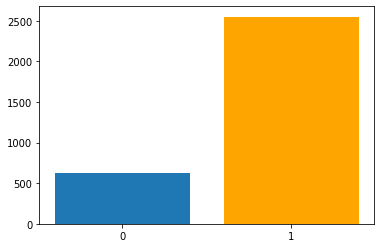

In [28]:
plt.bar('0', o)
plt.bar('1', z, color = 'orange')
plt.show()

In [29]:
cluster0 = []
words0 = ''

for index, word in enumerate(text_c):
        if labels[index] == 0:
            cluster0.append(word)
            words0 += ' '+str(words_for_visualization[index])

In [30]:
cluster1 = []
words1 = ''

for index, word in enumerate(text_c):
        if labels[index] == 1:
            cluster1.append(word)
            words1 += ' '+str(words_for_visualization[index])

In [31]:
words0[:500]

' mathematician writer mechanical computer Analytical Engine machine applications calculation published algorithm machine computer poet poem mathematics logic studies educational scientists Babbage Wheatstone Faraday author poetical science Analyst mathematical mathematician Babbage computers Analytical Engine tutor translated article engineer calculating engine computers computer algorithm machine historians engine developed capability computers calculating Babbage capabilities poetical science '

In [32]:
words1[:500]

# Nice result

' Augusta Ada King Countess Lovelace née Byron December November English chiefly known work Charles proposed She first beyond pure first intended carried As result often regarded first Byron child Lord Byron Lady Byron All Byrons children born wedlock women Byron separated wife month Ada born left England forever four months later He commemorated parting begins Is thy face like thy mothers fair child ADA sole daughter house heart He died Greece Ada eight years old Her mother remained bitter promo'

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

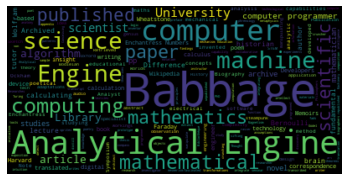

In [34]:
wordcloud = WordCloud().generate(words0)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

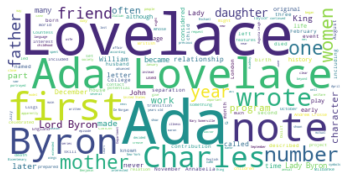

In [35]:
wordcloud = WordCloud(background_color="white").generate(words1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()